## Final Project Submission

Please fill out:
* Student name: Jane Njuguna
* Student pace:Full time
* Scheduled project review date/time:30/09/2022 
* Instructor name: Lucille Kaleha

## Business understanding
#### Business overview
Cherie real estate agency is a housing stakeholder that gives advice to homeowners so that they can buy and/or sell home. 
#### Objectives
We want to know how renovation of the 
We help homeowners to be able to predict the current and future prices of their houses depending on the renovations done on their houses so that they can know the best time to buy or sell their houses. 

We will build a model that will help us to predict the prices. This will help them to plan on so that they can be able to plan on when to buy 
We want to give to be able to give good advise to the homeowners about  the current and future prices of the houses

We want to do analysis and create a model so that we can know how the location and the condition of the house  might increase the estimated value of their homes and by what amount. This will help us 

## Importing dependencies 

In [92]:
# importing libraries
#For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For numerical operations
import numpy as np
#For data loading, data analysis and data cleaning 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Data loading
The data used is from kc_house_data.csv

In [93]:
# loading the data
houses_df = pd.read_csv("data/kc_house_data.csv")

## Data understanding
    * Checking the shape of the dataframe
    * Generate an overview of the dataframe

In [94]:
# to check the shape of the dataframe
houses_df.shape

(21597, 21)

In [95]:
# to check  information about the DataFrame
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [96]:
# checking the type of data types in the dataset
houses_df.dtypes.value_counts()

int64      9
object     6
float64    6
dtype: int64

In [97]:
#to check the columns in the dataset
houses_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [98]:
# the overview of the dataframe
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [99]:
# the overview of the dataframe
houses_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [100]:
# descriptive statistics of the dataset
houses_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [101]:
#checking the unique values per column
houses_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### Observations
1. The data used is in the form of a csv file.
2. The dataframe has 21597 rows and 21 columns.
3. The dataframe has 6 float64,9 int64 and 6 object data types.

## Data preparation
#### a) Univariant analysis
    * Data cleaning:Checking missing values and duplicates
    * Dropping columns not used
    * checking for outliers

In [102]:
# To check the the null values in the dataset
missing_data_check = houses_df.isnull().sum().sort_values(ascending = False)
missing_data_check

yr_renovated     3842
waterfront       2376
view               63
id                  0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
condition           0
grade               0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
sqft_lot15          0
dtype: int64

In [103]:
#percentage of missing values
total_percent = (houses_df.isnull().sum()/houses_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missing_data_check,total_percent],
                         axis = 1,keys =["total missing values","missing values percentage"])
missing_data

,total missing values,missing values percentage
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
id,0,0.000000
sqft_above,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000


### observations
* "waterfront", "view" and "yr_renovated" contains null values. The percentage of missing value in this columns are 0.110015,0.002917 and 0.177895 respectively.

#### Data cleaning
Since the percentage of the null per column in our dataset is low i opted to drop all the null values in the dataset.

    1.Dropping columns that will not be used
    2.Dealing with the null values

In [104]:
# Dropping columns that will not be used in the study
houses_df.drop(["yr_renovated","sqft_above","sqft_basement",
               "zipcode","sqft_lot15","sqft_living15","date","long","lat","view"],
               axis=1,inplace = True)

In [105]:
# Dropping null values in the dataset
houses_df.dropna(inplace = True)

In [107]:
#Checking for duplicate value
row,col = houses_df.shape
houses_df.drop_duplicates(inplace=True)

if houses_df.shape==(row,col):
    print('The dataset doesn\'t have any duplicates')
else:
    print('The dataset have duplicates')

The dataset doesn't have any duplicates


#### Observation
* The dataframe has no duplicated values

#### b) Bivariate

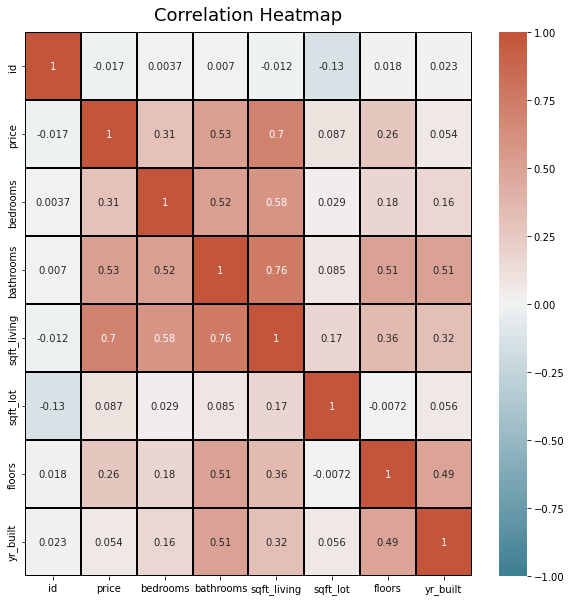

In [114]:
# plotting a heatmap
# It shows the correlation between different column pairs
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(
    houses_df.corr(),vmin=-1, vmax=1,center = 0,
    annot=True,cmap=cmap,linewidths=2, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Exploring 'price' column
1. Generate a heatmap to explore the price column
2. Compute the correlation coefficient for price column with other columns
3. Since 'price' column is our dependent variable i will analyse to see it relates with the independent variables


In [59]:
#descriptive statistics summary
summary_statistics = houses_df.price.describe()
print("count:",summary_statistics[0])
print("Mean of the price:",summary_statistics[1])
print("Standard deviation of mean:",summary_statistics[2])
print("Minimum value for price:",summary_statistics[3])
print("Lower quantile for mprice:",summary_statistics[4])
print("median for price:",summary_statistics[5])
print("Upper quantile for the price:",summary_statistics[6])
print("Maximum value for the price:",summary_statistics[7])

count: 19221.0
Mean of the price: 541639.8338275844
Standard deviation of mean: 372247.78731248045
Minimum value for price: 78000.0
Lower quantile for mprice: 322000.0
median for price: 450000.0
Upper quantile for the price: 644000.0
Maximum value for the price: 7700000.0


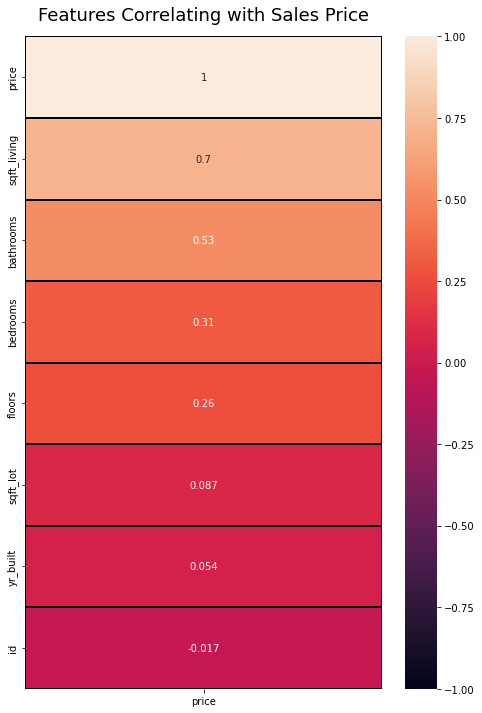

In [43]:
# plotting a heat map
# to show the correlation of price column with the independent variables 
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    houses_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

### Observations
There is a high correlation between sqft_living and bathroom with the price column

In [44]:
# function for checking for outliers
def outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
# Checking the number of outliers in the 'price' column
print("Count of outliers:",outlier(houses_df.price).count())

Count of outliers: 1051


In [45]:
#skewness and kurtosis
print("Skewness:",round(houses_df['price'].skew(),3))
print("Kurtosis:",round(houses_df['price'].kurt(),3))

Skewness: 4.134
Kurtosis: 36.024


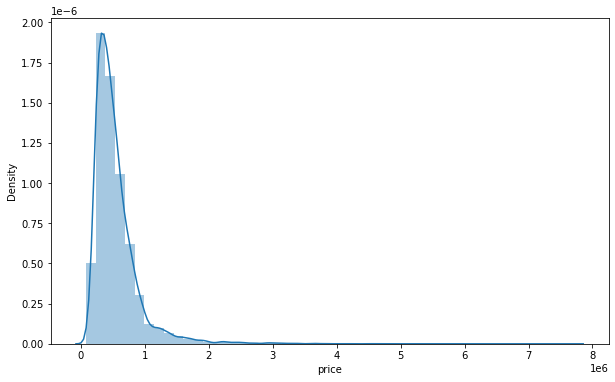

In [46]:
# Checking the distribution of price column
# sns.distplot(np.log(houses_df["price"]));
plt.figure(figsize=(10, 6))
sns.distplot(houses_df["price"]);

### Observations Of The Distribution Plot Of 'price' Column
1. Our plot shows that our data is not normally distributed.
2. Our plot shows that the price column displaces a Leptokurtic kurtosis
3. Our plot shows that the price column is Highly positively skewed


## Linear regression assumptions
### a) Linearity
#### Relationship of 'price' column with numerical variables

In [47]:
# to show the most correlated columns with price columns
PriceCorr = houses_df.corr()['price']
filteredcorr = PriceCorr[((PriceCorr >= .5) | (PriceCorr <= -.5)) & (PriceCorr !=1.000)].sort_values(ascending = False)
filteredcorr

sqft_living    0.704652
bathrooms      0.527350
Name: price, dtype: float64

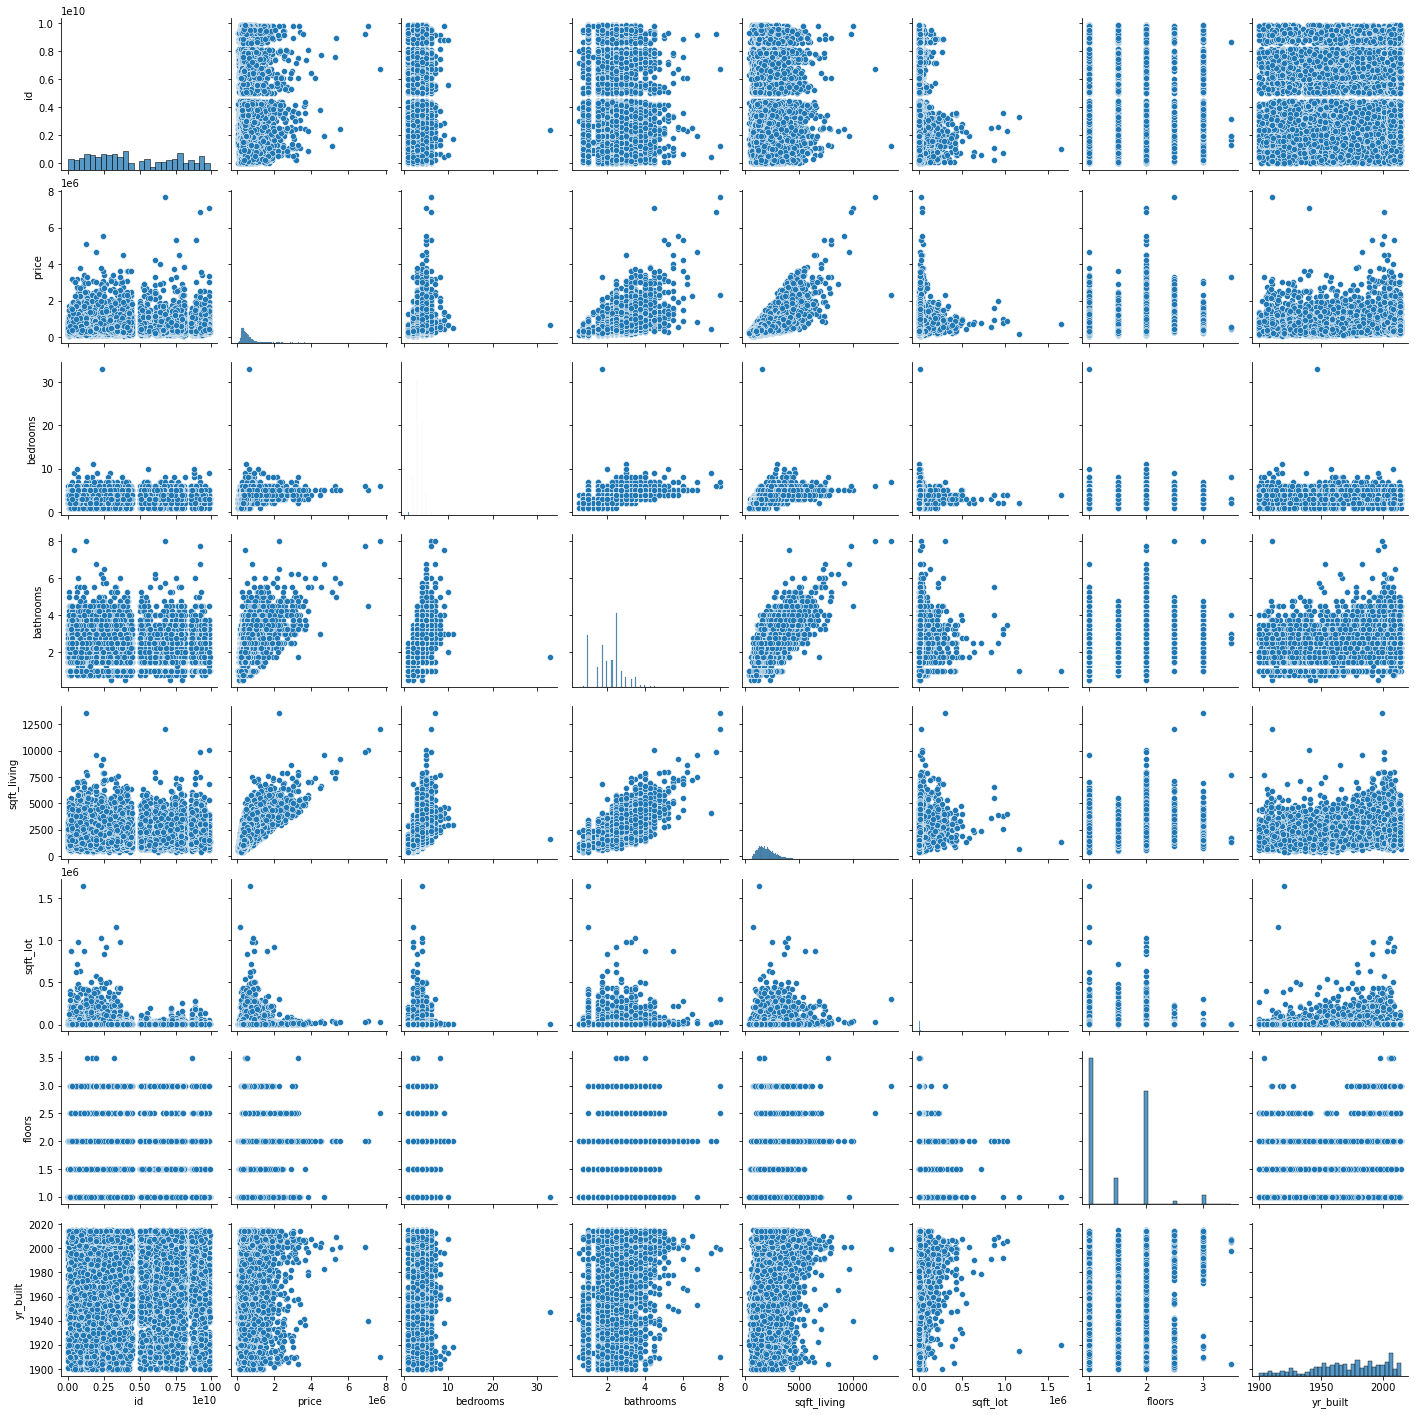

In [116]:
# Pairplot to show linearity
sns.pairplot(houses_df);

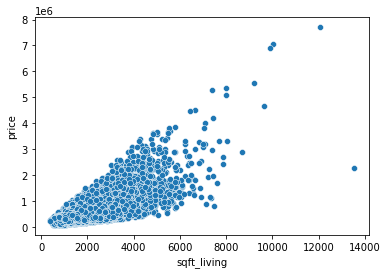

In [48]:
# A scatter plot between prie and sqft_living 
living = houses_df["sqft_living"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = living,y = price);

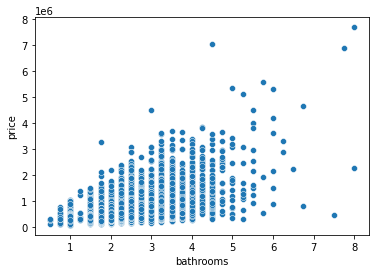

In [49]:
# A scatter plot between prie and bathrooms
bathrooms = houses_df["bathrooms"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = bathrooms,y = price);

### Observations
* 'sqft_living' and 'bathrooms' seem to be linearly related with 'price' column. This relationships are positive which means that as one variable increases the other increases.

#### Relationship of 'price' column with categorical variables

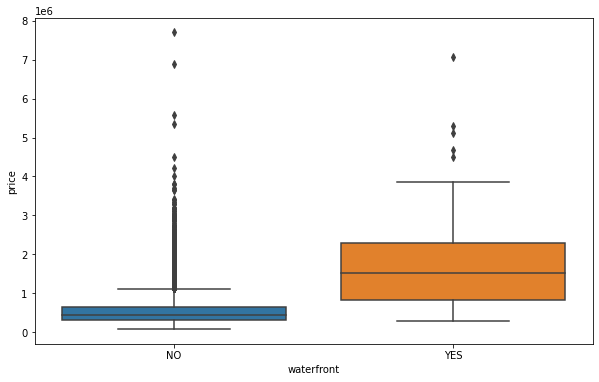

In [50]:
# Boxplot to show relationship between waterfront and prices
waterfront = houses_df.waterfront
data = pd.concat([houses_df['price'], houses_df["waterfront"]], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=waterfront,y=price,data=data);

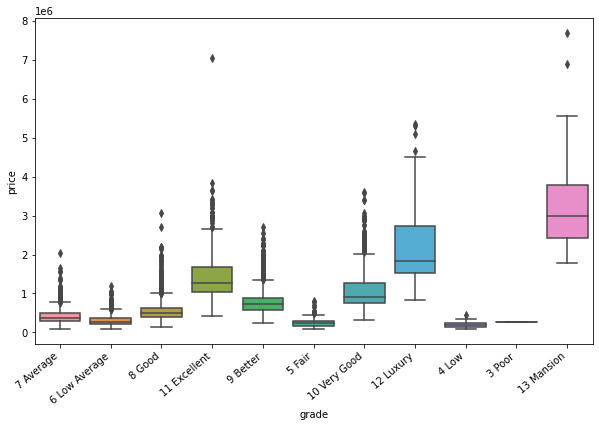

In [51]:
# Boxplot to show relationship between grade and prices
grade = houses_df.grade
data = pd.concat([houses_df['price'], houses_df["grade"]], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=grade,y=price,data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

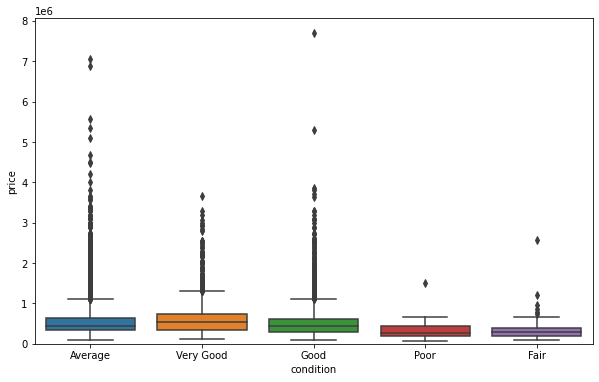

In [63]:
# Boxplot to show relationship between condition and prices
condition = houses_df.condition
data = pd.concat([houses_df['price'], houses_df["condition"]], axis=1)
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x=condition,y=price,data=data)
fig.axis(ymin=0);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

### Observations
* 'waterfront' and "price seems to be related because the houses that have a waterfront have higher prices.
* The relationship seems to be stronger in the case of 'condition' where the box plot shows how prices decrease with the condition of the house.
* 'grade' and 'price' are not related.

## Data exploration report
1. There is a high positive correlation between Square footage of living space in the home with the price.This means that an increase in the Square footage of living space in the home leads to increase in the price.
2. There is a high positive correlation between number of bathrooms with the price .This means that an increase in the number of bathrooms leads to increase in the price.
3. Our price column is not normally distributed.It is positively skewed and has a positive kurtosis.
4. 'waterfront' and "price seems to be related because  the presence of a waterfront near a home the higher the price.
5. 'condition' and 'price' seems to be related because a decrease in the condition of the house leads to a decrease in price

## Simple linear regression Model
For our  model, we are going to take Square footage of living space in the home as the independent variable and price as the dependent variable.

#### Determining the x and y variables

In [127]:
# independent variable

X = houses_df['sqft_living']

# dependent variable

y = houses_df['price']

#### Creating the model

In [128]:
# Creating a simple linear regression model

model = sm.OLS(endog=y, exog=sm.add_constant(X))  # Ordinary Least Squares 

results = model.fit()   # Fitting the model

In [135]:
# Model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Tue, 27 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:26:17   Log-Likelihood:            -2.6720e+05
No. Observations:               19219   AIC:                         5.344e+05
Df Residuals:                   19217   BIC:                         5.344e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.045e+04   4704.026    -10.726      0.000   -5.97e+04   -4.12e+04
sqft_living   284.3286      2.065    137.668      0.000     280.280     288.377
==============================================================================
Omnibus:                    13335.918   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507169.818
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      27.508   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the model

### Evaluate the performance
* Mean absolute error 
* Mean Square Error
* Root mean Squared Error

In [143]:
y_pred = results.predict(sm.add_constant(X))
print(f"Mean absolute error: {np.round(mean_absolute_error(y, y_pred), 4)}")
print(f"Mean squared error: {np.round(mean_squared_error(y, y_pred), 4)}")
print(f"Root mean squared error: {np.round(np.sqrt(mean_squared_error(y, y_pred)), 4)}")

Mean absolute error: 175088.9258
Mean squared error: 69767812136.4269
Root mean squared error: 264135.9728


#### Interpreting the Mean absolute error and root mean squared error

It means that our model is off by about 175088.9258 USD in a given prediction.

#### Interpreting the root mean squared error

It means that our model is off by about 264135.9728 USD in a given prediction.

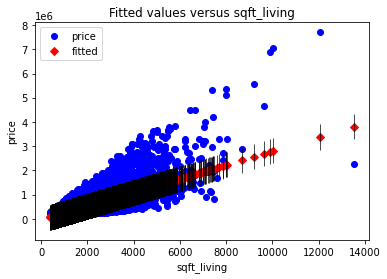

In [140]:
# Visualizing our model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

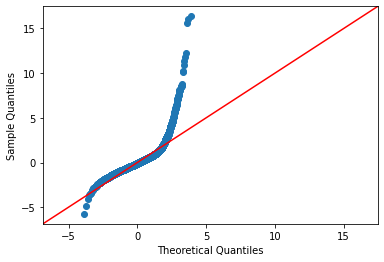

In [139]:
# visualizing the distribution of the residuals
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

### b) Normality

Skewness: 4.134
Kurtosis: 36.024


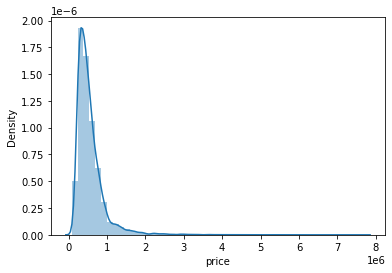

In [87]:
#skewness and kurtosis
print("Skewness:",round(houses_df['price'].skew(),3))
print("Kurtosis:",round(houses_df['price'].kurt(),3))
sns.distplot(houses_df['price']);

Skewness: 1.507
Kurtosis: 5.569


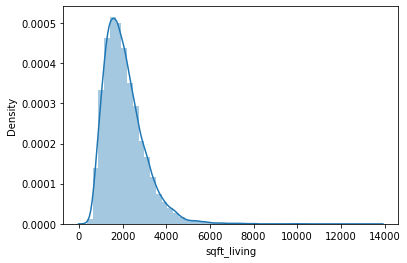

In [89]:
#skewness and kurtosis
print("Skewness:",round(houses_df['sqft_living'].skew(),3))
print("Kurtosis:",round(houses_df['sqft_living'].kurt(),3))
sns.distplot(houses_df['sqft_living']);

Skewness: 0.53
Kurtosis: 1.343


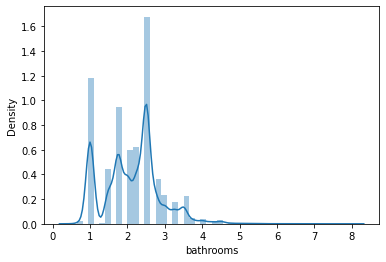

In [88]:
#skewness and kurtosis
print("Skewness:",round(houses_df['bathrooms'].skew(),3))
print("Kurtosis:",round(houses_df['bathrooms'].kurt(),3))
sns.distplot(houses_df['bathrooms']);